In [1]:
import pandas as pd

import numpy as np

import matplotlib

import matplotlib.pyplot as plt

import datetime

In [2]:
#read in data from csv file into dataframe
df = pd.read_csv("covid19-cdc-20202492.csv")

# Prepare a data quality report for the CSV file

## Check how many rows and columns within the file

In [3]:
df.shape



(10000, 12)

Dataset has 10000 entries with 12 features per entry

## Print first 10 and last 10 entries

In [4]:
df.head(10)

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/06/04,2020/06/04,2020/06/04,NaN,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Unknown,Unknown,No,No
1,2020/10/23,2020/10/23,NaN,NaN,Laboratory-confirmed case,Female,10 - 19 Years,Unknown,Missing,Missing,No,Missing
2,2020/07/22,2020/10/22,NaN,2020/07/22,Laboratory-confirmed case,Female,70 - 79 Years,Unknown,No,Missing,No,Missing
3,2020/10/29,2020/11/20,NaN,2020/10/29,Laboratory-confirmed case,Male,70 - 79 Years,"White, Non-Hispanic",No,Missing,No,Missing
4,2021/01/01,NaN,NaN,NaN,Laboratory-confirmed case,Male,40 - 49 Years,"White, Non-Hispanic",Missing,Missing,No,Missing
5,2020/12/23,2020/12/23,NaN,NaN,Laboratory-confirmed case,Female,40 - 49 Years,"White, Non-Hispanic",Missing,Missing,No,Missing
6,2021/01/08,2021/01/08,NaN,2021/01/08,Laboratory-confirmed case,Male,30 - 39 Years,Unknown,No,Missing,No,Missing
7,2021/01/02,2021/01/03,NaN,2021/01/03,Laboratory-confirmed case,Male,60 - 69 Years,"White, Non-Hispanic",No,Missing,No,Missing
8,2020/12/21,2020/12/21,NaN,NaN,Laboratory-confirmed case,Female,10 - 19 Years,"White, Non-Hispanic",Unknown,Unknown,No,Missing
9,2020/12/18,NaN,NaN,NaN,Laboratory-confirmed case,Female,0 - 9 Years,Unknown,No,Missing,No,Missing


In [5]:
df.tail(10)

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
9990,2020/12/10,NaN,NaN,NaN,Laboratory-confirmed case,Male,50 - 59 Years,Unknown,Unknown,Missing,No,Missing
9991,2020/09/02,2020/09/02,NaN,NaN,Laboratory-confirmed case,Female,40 - 49 Years,"Asian, Non-Hispanic",No,Missing,No,Missing
9992,2020/11/02,2020/11/10,2020/11/02,2020/11/02,Laboratory-confirmed case,Female,70 - 79 Years,Unknown,No,Missing,No,Yes
9993,2020/12/02,NaN,NaN,NaN,Laboratory-confirmed case,Male,30 - 39 Years,Unknown,Unknown,Missing,No,Missing
9994,2020/08/16,2020/08/18,2020/08/16,2020/08/16,Laboratory-confirmed case,Female,20 - 29 Years,"White, Non-Hispanic",Missing,Missing,No,No
9995,2020/12/27,2020/12/27,NaN,2020/12/27,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Unknown,Missing,No,Missing
9996,2020/10/03,2020/10/03,NaN,NaN,Laboratory-confirmed case,Male,20 - 29 Years,"White, Non-Hispanic",Unknown,Missing,No,Missing
9997,2020/12/30,2021/01/03,NaN,2020/12/30,Laboratory-confirmed case,Male,70 - 79 Years,"White, Non-Hispanic",No,Missing,No,Missing
9998,2020/11/09,2020/11/09,NaN,2020/11/09,Laboratory-confirmed case,Female,60 - 69 Years,Unknown,No,Missing,No,Missing
9999,2020/11/06,2020/11/08,2020/11/06,NaN,Laboratory-confirmed case,Male,20 - 29 Years,"White, Non-Hispanic",Missing,Missing,No,Missing


## Get the datatypes for each column

In [6]:
df.dtypes

cdc_case_earliest_dt       object
cdc_report_dt              object
pos_spec_dt                object
onset_dt                   object
current_status             object
sex                        object
age_group                  object
race_ethnicity_combined    object
hosp_yn                    object
icu_yn                     object
death_yn                   object
medcond_yn                 object
dtype: object

## Get count, unique entries, top and freq for features

In [7]:
df.describe().T

,count,unique,top,freq
cdc_case_earliest_dt,10000,323,2021/01/04,129
cdc_report_dt,7648,324,2020/06/10,144
pos_spec_dt,2789,314,2021/01/04,34
onset_dt,5059,325,2020/12/08,47
current_status,10000,2,Laboratory-confirmed case,9349
sex,10000,4,Female,5109
age_group,10000,10,20 - 29 Years,1949
race_ethnicity_combined,10000,9,Unknown,4050
hosp_yn,10000,4,No,5152
icu_yn,10000,4,Missing,7710


## Get the unique entries for each feature (except dates would be too long)

In [8]:
obbys = df.select_dtypes(['object']).columns

for i in obbys[4:]:
    print(i,"unique values:",df[i].unique())



current_status unique values: ['Laboratory-confirmed case' 'Probable Case']
sex unique values: ['Female' 'Male' 'Unknown' 'Missing']
age_group unique values: ['30 - 39 Years' '10 - 19 Years' '70 - 79 Years' '40 - 49 Years'
 '60 - 69 Years' '0 - 9 Years' '80+ Years' '50 - 59 Years' '20 - 29 Years'
 'Missing']
race_ethnicity_combined unique values: ['Unknown' 'White, Non-Hispanic' 'Hispanic/Latino'
 'Multiple/Other, Non-Hispanic' 'Black, Non-Hispanic'
 'Asian, Non-Hispanic' 'Missing'
 'American Indian/Alaska Native, Non-Hispanic'
 'Native Hawaiian/Other Pacific Islander, Non-Hispanic']
hosp_yn unique values: ['Unknown' 'Missing' 'No' 'Yes']
icu_yn unique values: ['Unknown' 'Missing' 'No' 'Yes']
death_yn unique values: ['No' 'Yes']
medcond_yn unique values: ['No' 'Missing' 'Unknown' 'Yes']


## Get the count for each entry in the categorical datatype (excluding dates)

In [9]:
# get a count for the unique values in the non-date columns
for i in obbys[4:]:
    print("---------------------------")
    print(i)
    print("---------------------------")
    print(df[i].value_counts())

---------------------------
current_status
---------------------------
Laboratory-confirmed case    9349
Probable Case                 651
Name: current_status, dtype: int64
---------------------------
sex
---------------------------
Female     5109
Male       4805
Unknown      80
Missing       6
Name: sex, dtype: int64
---------------------------
age_group
---------------------------
20 - 29 Years    1949
30 - 39 Years    1612
50 - 59 Years    1463
40 - 49 Years    1400
60 - 69 Years    1048
10 - 19 Years    1030
70 - 79 Years     591
0 - 9 Years       455
80+ Years         440
Missing            12
Name: age_group, dtype: int64
---------------------------
race_ethnicity_combined
---------------------------
Unknown                                                 4050
White, Non-Hispanic                                     3230
Hispanic/Latino                                          995
Black, Non-Hispanic                                      749
Multiple/Other, Non-Hispanic          

## get the sum of null entries for each datatype (excluding dates)

In [10]:
df[obbys].isnull().sum()

cdc_case_earliest_dt          0
cdc_report_dt              2352
pos_spec_dt                7211
onset_dt                   4941
current_status                0
sex                           0
age_group                     0
race_ethnicity_combined       0
hosp_yn                       0
icu_yn                        0
death_yn                      0
medcond_yn                    0
dtype: int64

Null for the values reported is not necessarily poor data as pos_spec_dt is date of first positive specimen collection and onset_dt is the date of symptom onset. The absence of data indicates no positive specimen was collected or symptoms manifested

## Convert the dates to datetime

In [11]:
df["cdc_case_earliest_dt"]=pd.to_datetime(df["cdc_case_earliest_dt"],format='%Y/%m/%d')
df["cdc_report_dt"]= pd.to_datetime(df["cdc_report_dt"],format='%Y/%m/%d')
df["pos_spec_dt"]= pd.to_datetime(df["pos_spec_dt"],format='%Y/%m/%d')
df["onset_dt"]= pd.to_datetime(df["onset_dt"],format='%Y/%m/%d')

Check that the conversion was successful

In [12]:
df.dtypes

cdc_case_earliest_dt       datetime64[ns]
cdc_report_dt              datetime64[ns]
pos_spec_dt                datetime64[ns]
onset_dt                   datetime64[ns]
current_status                     object
sex                                object
age_group                          object
race_ethnicity_combined            object
hosp_yn                            object
icu_yn                             object
death_yn                           object
medcond_yn                         object
dtype: object

## Get descriptive stats for (now) datetime features

In [13]:
df.select_dtypes(include=['datetime64[ns]']).describe().T

,count,unique,top,freq,first,last
cdc_case_earliest_dt,10000,323,2021-01-04,129,2020-01-01,2021-01-16
cdc_report_dt,7648,324,2020-06-10,144,2020-03-08,2021-01-29
pos_spec_dt,2789,314,2021-01-04,34,2020-03-14,2021-01-23
onset_dt,5059,325,2020-12-08,47,2020-01-01,2021-01-28


## Convert features to appropriate data types

In [14]:
continuous_columns = df.select_dtypes(["datetime64[ns]"]).columns

In [15]:
categorical_columns = df.select_dtypes(['object']).columns
for i in categorical_columns:
    df[i] = df[i].astype("category")

In [16]:
df.dtypes

cdc_case_earliest_dt       datetime64[ns]
cdc_report_dt              datetime64[ns]
pos_spec_dt                datetime64[ns]
onset_dt                   datetime64[ns]
current_status                   category
sex                              category
age_group                        category
race_ethnicity_combined          category
hosp_yn                          category
icu_yn                           category
death_yn                         category
medcond_yn                       category
dtype: object

## check for duplicate rows/columns

In [17]:
print('Number of duplicate rows (not including first) in the dataset is: ', df.duplicated().sum())


Number of duplicate rows (not including first) in the dataset is:  465


In [18]:
print('Number of duplicate rows (including first) in the dataset is:', df[df.duplicated(keep=False)].shape[0])

Number of duplicate rows (including first) in the dataset is: 841


In [19]:
dfT = df.T
print("Number of duplicate columns (not including first) in the dataset is: ", dfT.duplicated().sum())
print("Number of duplicate columns (including first) in the dataset is: ",  dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicate columns (not including first) in the dataset is:  0
Number of duplicate columns (including first) in the dataset is:  0


### Show duplicated rows, (To get an idea of where/why the duplication is occuring)

In [20]:
df[df.duplicated(keep=False)]

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
40,2020-12-10,NaT,NaT,NaT,Laboratory-confirmed case,Male,40 - 49 Years,Unknown,Unknown,Missing,No,Missing
65,2020-12-21,NaT,NaT,NaT,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Missing,Missing,No,Missing
89,2020-12-30,NaT,NaT,NaT,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,Missing,Missing,No,Missing
98,2021-01-06,NaT,NaT,NaT,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Unknown,Missing,No,Missing
100,2020-12-28,NaT,NaT,NaT,Laboratory-confirmed case,Male,50 - 59 Years,Unknown,Missing,Missing,No,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...
9907,2021-01-14,NaT,NaT,NaT,Laboratory-confirmed case,Male,50 - 59 Years,Unknown,Unknown,Missing,No,Missing
9930,2020-06-22,NaT,NaT,NaT,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,Unknown,Missing,No,Missing
9961,2020-12-28,NaT,NaT,NaT,Laboratory-confirmed case,Female,50 - 59 Years,Unknown,Unknown,Missing,No,Missing
9990,2020-12-10,NaT,NaT,NaT,Laboratory-confirmed case,Male,50 - 59 Years,Unknown,Unknown,Missing,No,Missing


In [21]:
df[df.duplicated(keep=False)].tail(10)

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
9857,2021-01-14,NaT,NaT,NaT,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,Missing,Missing,No,Missing
9884,2020-12-08,NaT,NaT,NaT,Laboratory-confirmed case,Male,30 - 39 Years,Unknown,Missing,Missing,No,Missing
9889,2021-01-04,NaT,NaT,NaT,Laboratory-confirmed case,Male,20 - 29 Years,"White, Non-Hispanic",Missing,Missing,No,Missing
9900,2020-12-29,NaT,NaT,NaT,Laboratory-confirmed case,Male,30 - 39 Years,Unknown,Missing,Missing,No,Missing
9904,2020-11-17,NaT,NaT,NaT,Laboratory-confirmed case,Female,10 - 19 Years,Unknown,Missing,Missing,No,Missing
9907,2021-01-14,NaT,NaT,NaT,Laboratory-confirmed case,Male,50 - 59 Years,Unknown,Unknown,Missing,No,Missing
9930,2020-06-22,NaT,NaT,NaT,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,Unknown,Missing,No,Missing
9961,2020-12-28,NaT,NaT,NaT,Laboratory-confirmed case,Female,50 - 59 Years,Unknown,Unknown,Missing,No,Missing
9990,2020-12-10,NaT,NaT,NaT,Laboratory-confirmed case,Male,50 - 59 Years,Unknown,Unknown,Missing,No,Missing
9993,2020-12-02,NaT,NaT,NaT,Laboratory-confirmed case,Male,30 - 39 Years,Unknown,Unknown,Missing,No,Missing


Upon further inspection it appears that the duplicate rows are the result of Missing/Unknown/Null values for the majority of columns

### See if the duplicate rows have any positive instances of the target feature

In [22]:
duplicate_df = df[df.duplicated(keep=False)]

(duplicate_df["death_yn"] == "Yes").sum()

0

There are no duplicate columns where the entry has died.

# Drop duplicate rows

In [23]:
df = df.drop_duplicates(keep=False)

In [24]:
print("Remaining duplicate rows: ", df[df.duplicated(keep=False)].shape[0])

Remaining duplicate rows:  0


## Check for constant columns

In [25]:
df.select_dtypes(["category"]).describe().T

,count,unique,top,freq
current_status,9159,2,Laboratory-confirmed case,8519
sex,9159,4,Female,4669
age_group,9159,10,20 - 29 Years,1694
race_ethnicity_combined,9159,9,Unknown,3306
hosp_yn,9159,4,No,5011
icu_yn,9159,4,Missing,6887
death_yn,9159,2,No,8810
medcond_yn,9159,4,Missing,6731


All category data have more than 1 unique value, there are no constant columns, so their inclusion going forward is appropriate

## Descriptive Statistics for Continuous Features

### Show range and the 50 most common entries for Continuous features

In [26]:
for i in continuous_columns:
    print("\033[1m"+"********************\n")
    print(i)
    print("-------------------------\n" + "\033[0m")
    print("Date range for {} is: ".format(i), (df[i].max() - df[i].min()))
    print("-------------------------")
    print("Date", "\t   Number of Cases \n")
    print(df[i].value_counts().nlargest(50), "\n\n\n")
    print("Null Values: ",df[i].isna().sum())

********************

cdc_case_earliest_dt
-------------------------

Date range for cdc_case_earliest_dt is:  381 days 00:00:00
-------------------------
Date 	   Number of Cases 

2021-01-05    91
2021-01-11    88
2021-01-04    87
2020-12-07    85
2020-12-18    84
2020-12-21    81
2020-12-17    80
2021-01-06    80
2020-12-28    79
2020-12-01    79
2020-12-08    79
2020-12-30    79
2020-12-29    79
2020-12-09    75
2020-12-22    75
2020-11-30    71
2020-12-10    71
2020-11-17    69
2020-12-02    69
2020-11-10    69
2020-12-14    69
2020-12-23    68
2020-12-11    66
2020-12-15    66
2021-01-08    65
2020-11-25    65
2020-11-16    64
2020-11-23    64
2020-12-12    64
2021-01-12    64
2020-11-18    62
2020-11-28    62
2020-12-04    62
2021-01-13    62
2020-12-31    62
2020-11-09    61
2020-12-16    60
2021-01-15    60
2020-12-03    59
2020-12-24    59
2021-01-09    58
2020-12-06    58
2020-12-26    58
2020-11-06    57
2021-01-07    56
2020-11-20    56
2020-12-27    56
2020-12-19    54
20

## Histograms for continous features

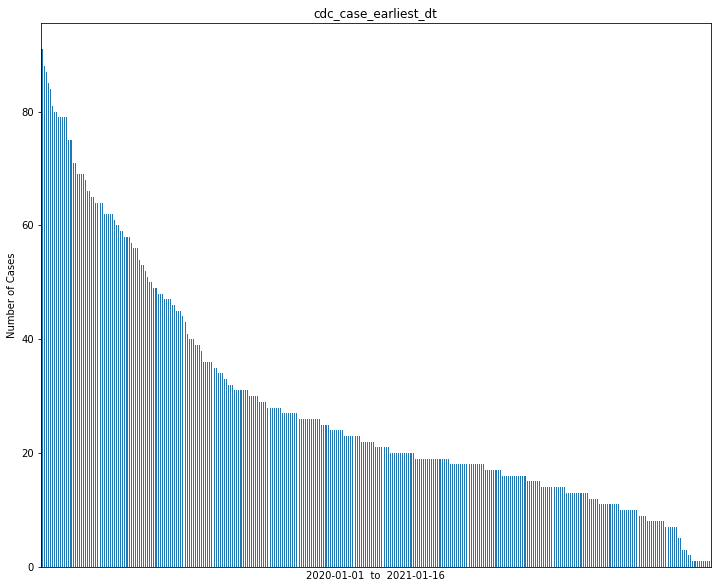

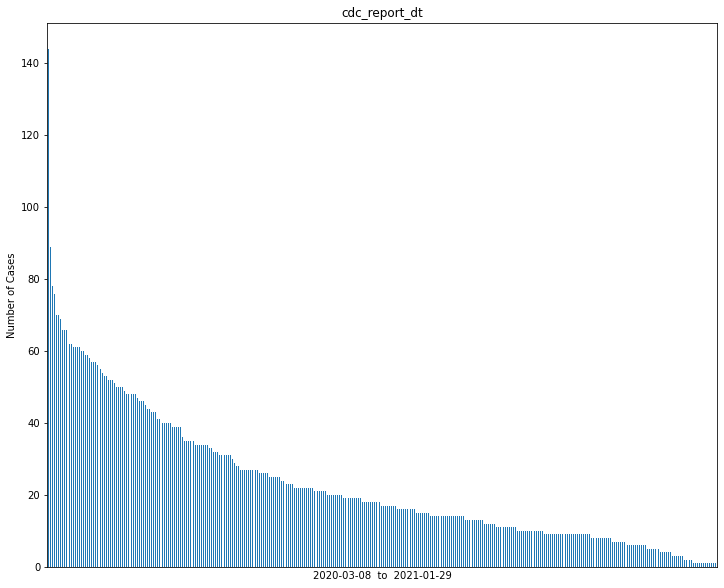

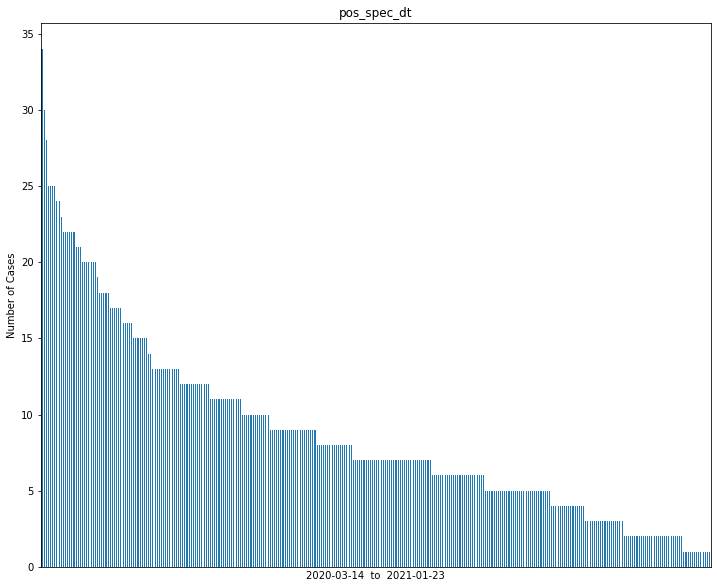

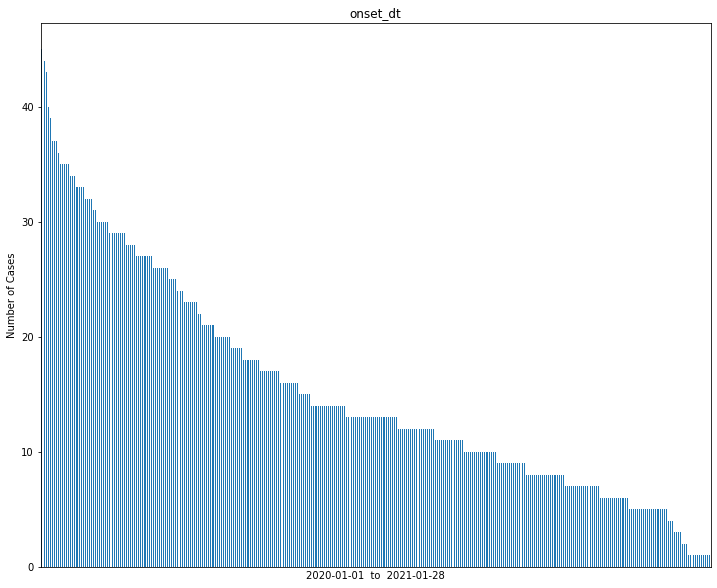

In [27]:

for i in continuous_columns:
    p = df[i].value_counts().plot(kind="bar" , figsize=(12,10))
    plt.title(i)
    plt.ylabel("Number of Cases")
    date_range=str(df[i].min().date()) + "  to  " + str(df[i].max().date())
    plt.xlabel(date_range)
    plt.xticks([])
    plt.savefig("continuous_histogram_"+i+".pdf")
    plt.show()

### Boxplots for Continous features/frequency

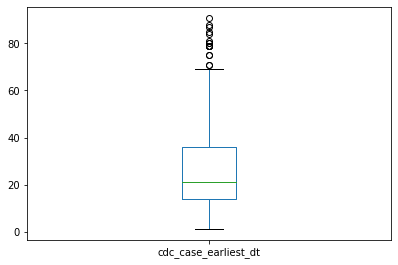

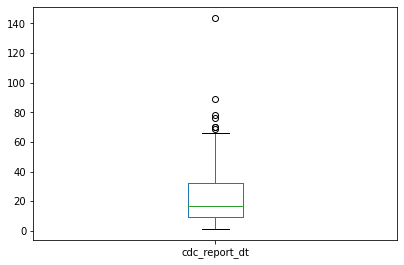

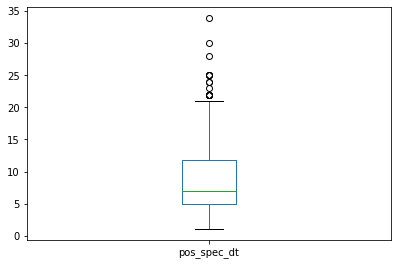

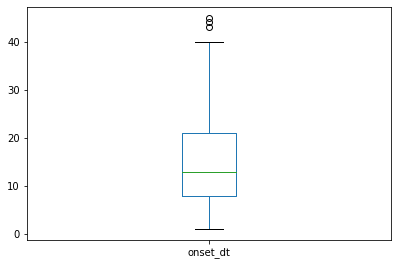

In [28]:
for i in continuous_columns:
    df[i].value_counts().plot(kind='box', subplots=True, figsize=(30,30), layout=(6,4), sharex=False, sharey=False)
    plt.savefig("continous_boxplot_frequency_"+i+".pdf")
    plt.show()


## Prepare a table with descriptive statistics for all the categorical features

In [29]:
categorical_columns = df.select_dtypes(["category"]).columns
cat_feat_to_save = df[categorical_columns].describe().T

## Create Barcharts for all categorical features

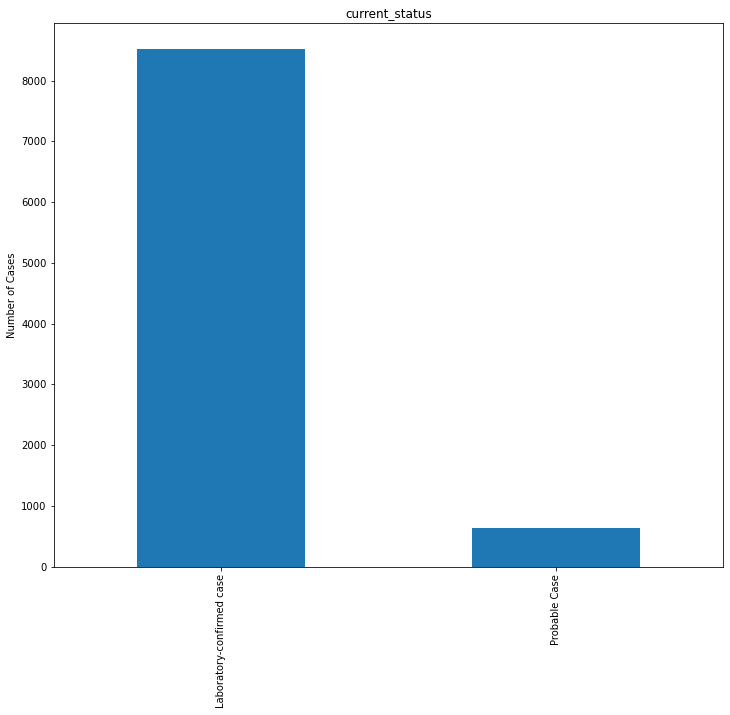

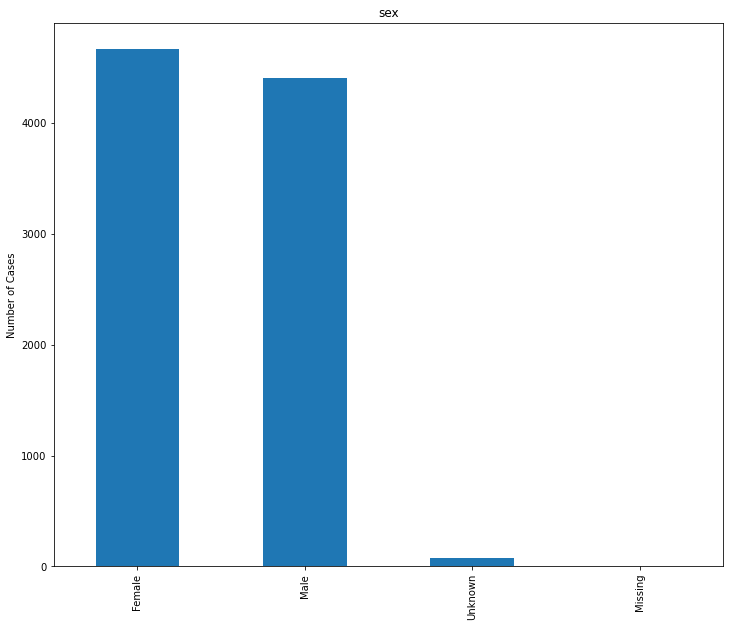

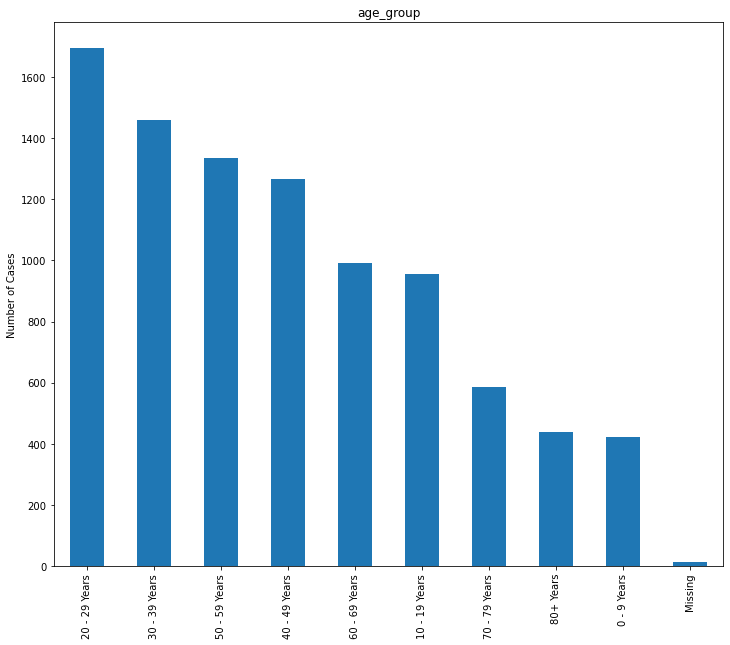

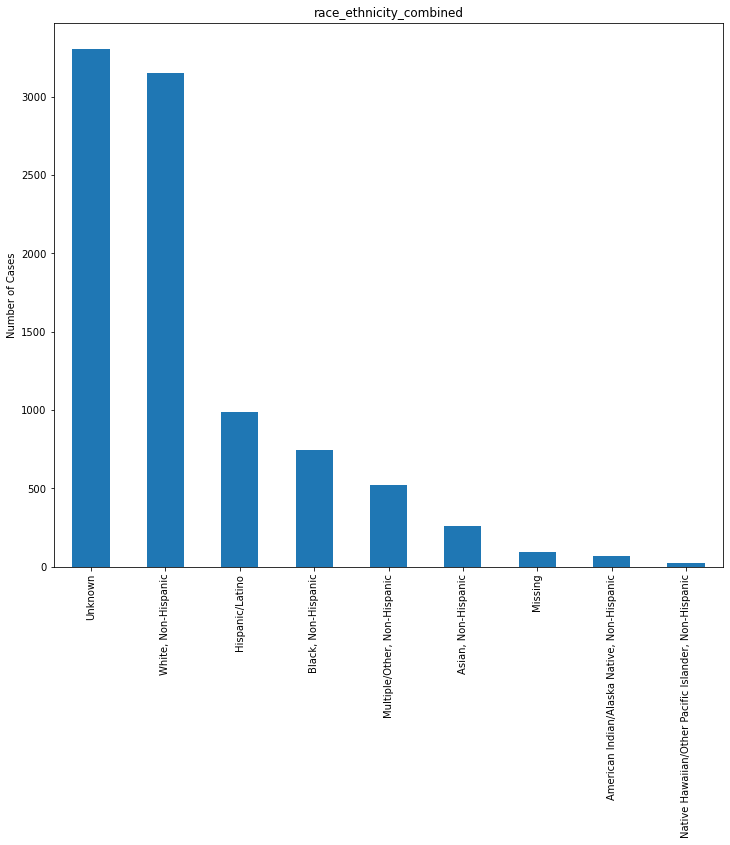

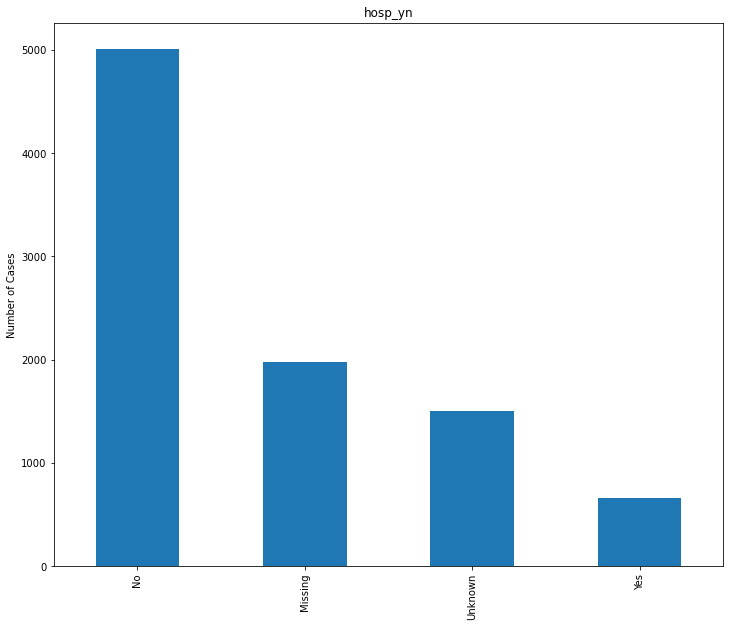

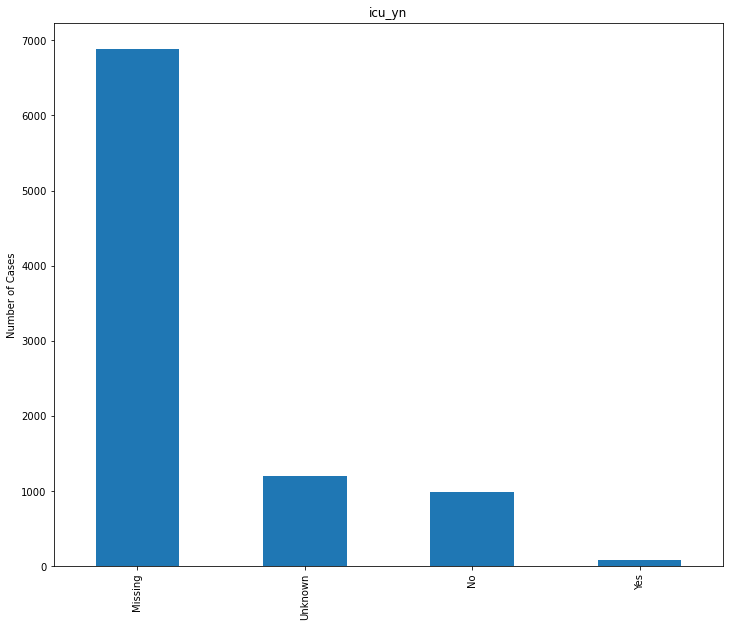

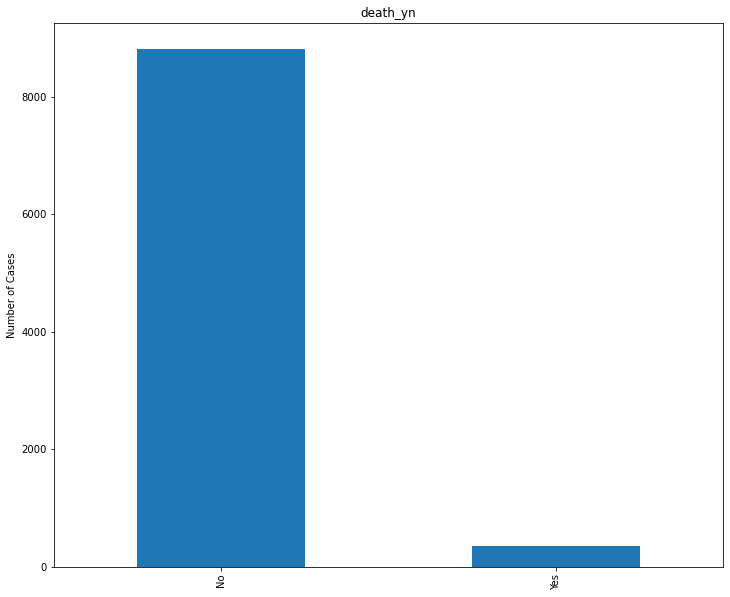

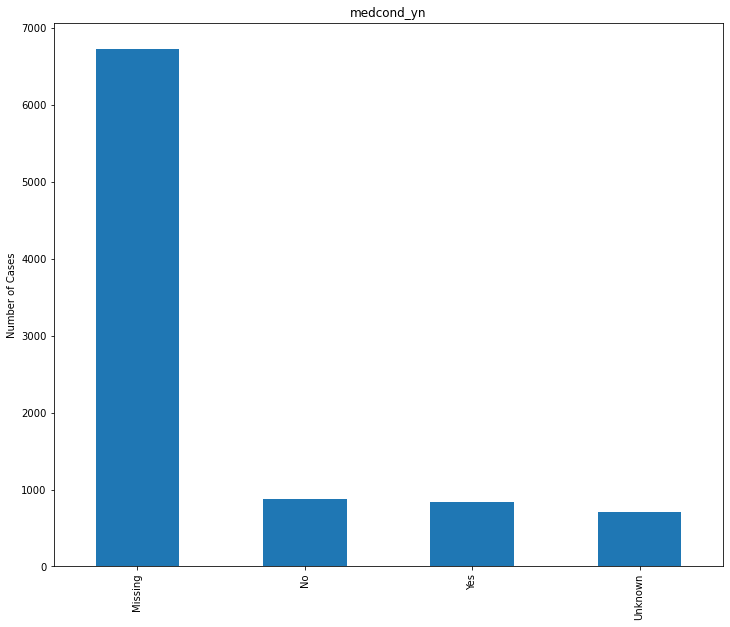

In [30]:
for i in categorical_columns:
    p = df[i].value_counts().plot(kind="bar" , figsize=(12,10))
    plt.title(i)
    plt.ylabel("Number of Cases")
    plt.savefig("categorical_barchart_"+i+".pdf")
    plt.show()

## Issues found from the barcharts
- Missing value for sex
- Missing values for age
- Missing value for medcondition
- Unknown most common value for race/ethnicity


### Find the sum of the problematic entries

In [31]:
# Sum of entries where value of sex feature is Missing
(df["sex"] == "Missing").sum()

6

In [32]:
# Sum of entries where value of hosp_yn feature is Unknown
(df["hosp_yn"]=="Unknown").sum()

1504

In [33]:
# Sum of entries where value of icu_yn feature is Unknown
(df["icu_yn"]=="Unknown").sum()

1202

In [34]:
# Sum of entries where value of icu_yn feature is Unknown and hosp_yn isnt unknown
((df["icu_yn"] == "Unknown") & (df["hosp_yn"] != "Unknown")).sum()

710

In [35]:
# Sum of entries where value of icu_yn feature isnt Unknown and hosp_yn is unknown
((df["icu_yn"] != "Unknown") & (df["hosp_yn"] == "Unknown")).sum()

1012

## Logical consistency

Sum the rows where icu status is yes but hosp status is missing or unknown

In [36]:
((df["icu_yn"] == "Yes") & (df["hosp_yn"] == "Missing")).sum()



0

In [37]:
((df["icu_yn"] == "Yes") & (df["hosp_yn"] == "Unknown")).sum()

0

No rows found with positive icu status and unknown/missing hosp status. This allows us to infer that the missingvalues for hospital admission are the equivalent of a NULL value, as cases cannot be in the ICU without first going to the hospital.

In [38]:
((df["icu_yn"] == "Unknown") & (df["hosp_yn"] == "Unknown")).sum()

492

In [39]:
((df["icu_yn"] == "Missing") & (df["hosp_yn"] == "Yes")).sum()

301

In [40]:
((df["icu_yn"] == "Missing") & (df["hosp_yn"] == "No")).sum()

3613

Based on these values it would be safe to assume that Missing for the icu_yn is the equvalent to a No value.
as Missing for icu is much greater when hosp_yn is No (where icu would also be a no).

## Check cardinality for continuous features

In [41]:

features_cardinality = list(df[continuous_columns].columns.values)

print('{0:35}  {1}'.format("Feature", "Cardinality"))
print('{0:35}  {1}'.format("-------", "--------------- \n"))

for i in features_cardinality:
    print('{0:35}  {1}'.format(i, str(len(df[i].unique()))))

Feature                              Cardinality
-------                              --------------- 

cdc_case_earliest_dt                 323
cdc_report_dt                        325
pos_spec_dt                          315
onset_dt                             326


### Save updates data frame to new csv file

In [42]:
df.to_csv("cdc_data_cleaned_1.csv",index=False)

### Save descriptive stats for continious features to csv file

In [43]:
cont_feat_to_save = df[continuous_columns].describe().T
cont_feat_to_save.to_csv("continousFeatureDescription1.csv")

### Save descriptive stats for categorical features to csv file

In [44]:
cat_feat_to_save.to_csv("categoricalFeatureDescription.csv")

## Initial findings

# Data Quality plan

## The initial issues identified within the data
- Duplicate rows, these have been dropped as they contain mostly missing or unknown data and have no positive instances of the target
- Missing and unknown values in sex
- Missing ICU data
- Race and ethniciy column, Nearly 50% of the data is missing or unknown
- Missing data in age_group
- Missing and unknown data in medcond
- Unknown hospital values
- Unknown ICU values



## Proposed Solutions

1. *Duplicate rows*
* As stated before these have been dropped

2. *Missing and unknown Sex*
 * As these rows make up a very small percentage of the overall data these can be safely dropped with little to no impact. There is no predictive value on the target as Unknown and Missing are errors within the data collection (e.g There is little value is showing the percentage of death among the Unknown sex as that doesnt exist)

3. *Missing ICU data*
 * Based on the included form (pui-form.pdf) it can be safe to assume that missing in this instance means that the appropriate areas on the form were not completed. This can then be taken to defaulting to No as a result of user error (Leaving it blank rather then marking no). Conversion to No is then appropriate

4. *Race and ethnicity Column*
 * as Unknown or Missing makes up nearly half of the data for this column there is little predictive value from using this column. It should therefor be dropped from the dataset.
 
 * This was chosen over conversion as there is no accurate way to infer the correct value from the other data present (unlike ICU and Hospital in which there is a clear connection).
 
 * As the Missing and unknown data makes up nearly half it would be unsound to leave the column in the dataset 

5. *Missing age_group*
* As these rows make up a very small percentage of the overall data these can be safely dropped with little to no impact

* Again there would be no use in leaving the data in as a predictor of the target as Missing is a data error and not a valid category

* There is also no other column with which to infer the correct age_group so conversion would not be appropriate either

6. *Missing and unknown data in medcond*
 * Rows with the "Unknown" value should be dropped from the table as they provide no predictive value with regards to the target feature.
 
* Based on the included form (pui-form.pdf) it can be safe to assume that missing in this instance means that the appropriate areas on the form were not completed. Therefore it would be appropriate to convert these to "No"

7. *"Unknown" value for hospital*
 * These rows provide no predictive value for the target feature and should therefore be dropped
 
 * There is also no other feature with which to infer the correct hosp_yn so conversion would not be appropriate 


8. *"Unknown" value for ICU*
 * These rows provide no predictive value for analysis and should therefore be dropped
 
 * There is also no other feature with which to infer the correct icu_yn so conversion would not be appropriate either



## Missing and unknown sex values

In [45]:
# Replace Missing and unknown in the Sex feature with a dummy value "A"
# This was the only way to get rid of  empty missing and unknown categories from the charts, dont know why this works. CS support centre has no idea why this works, But it does so im rolling with it
df["sex"].replace({"Missing":"A"},inplace=True)
df["sex"].replace({"Unknown":"A"},inplace=True)



# include only the rows where sex does not equal the A dummy value
df = df[df.sex != "A"]


In [46]:
#df["sex"].replace({"Missing":"No"},inplace=True)
#df["sex"].replace({"Unknown":"No"},inplace=True)

### Missing ICU data

In [47]:
#Replaces instances of "Missing" in icu_yn with "No"
df["icu_yn"].replace({"Missing":"No"},inplace=True)

### Race and ethnicity column

In [48]:
# Drops the columns race_ethnicity_combined from the dataframe
df.drop(["race_ethnicity_combined"], axis=1, inplace=True)

### Missing age_group

In [49]:
# Change missing value in the age_group column to a dummy value "A", again this was the only way to prevent further issues with charts
df["age_group"].replace({"Missing":"A"},inplace=True)
df = df[df.age_group != "A"]

### Missing and Unknown data for medcond_yn

In [50]:
print("Values to change",np.sum(df["medcond_yn"]=="Missing"))

Values to change 6638


In [51]:
print("Rows to Delete ",np.sum(df["medcond_yn"]=="Unknown"))

Rows to Delete  702


In [52]:
#remove rows with value Unknown for medcond_yn
df = df[df.medcond_yn != "Unknown"]

In [53]:
#Replace values
df["medcond_yn"].replace({"Missing":"No"},inplace=True)

In [54]:
# Give the first 10 entries a check just to make sure its all working OK
df.head(10)

# have a little cheer because my god this has gone wrong a lot

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020-06-04,2020-06-04,2020-06-04,NaT,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Unknown,No,No
1,2020-10-23,2020-10-23,NaT,NaT,Laboratory-confirmed case,Female,10 - 19 Years,Missing,No,No,No
2,2020-07-22,2020-10-22,NaT,2020-07-22,Laboratory-confirmed case,Female,70 - 79 Years,No,No,No,No
3,2020-10-29,2020-11-20,NaT,2020-10-29,Laboratory-confirmed case,Male,70 - 79 Years,No,No,No,No
4,2021-01-01,NaT,NaT,NaT,Laboratory-confirmed case,Male,40 - 49 Years,Missing,No,No,No
5,2020-12-23,2020-12-23,NaT,NaT,Laboratory-confirmed case,Female,40 - 49 Years,Missing,No,No,No
6,2021-01-08,2021-01-08,NaT,2021-01-08,Laboratory-confirmed case,Male,30 - 39 Years,No,No,No,No
7,2021-01-02,2021-01-03,NaT,2021-01-03,Laboratory-confirmed case,Male,60 - 69 Years,No,No,No,No
8,2020-12-21,2020-12-21,NaT,NaT,Laboratory-confirmed case,Female,10 - 19 Years,Unknown,Unknown,No,No
9,2020-12-18,NaT,NaT,NaT,Laboratory-confirmed case,Female,0 - 9 Years,No,No,No,No


### Unknown values for hospital

In [55]:
print("Rows to Delete ",np.sum(df["hosp_yn"]=="Unknown"))
print("Values to change",np.sum(df["hosp_yn"]=="Missing"))

Rows to Delete  1090
Values to change 1935


In [56]:
# Remove unknown values
df = df[df.hosp_yn != "Unknown"]

In [57]:
# Change missing values
df["hosp_yn"].replace({"Missing":"No"},inplace=True)

### Unknown values for ICU


In [58]:
print("Rows to Delete ",np.sum(df["icu_yn"]=="Unknown"))

Rows to Delete  456


In [59]:
df = df[df.icu_yn != "Unknown"]

### Save cleaned dataframe to new csv file

In [60]:
df.to_csv("cdc_data_cleaned2_afterPlan.csv",index=False)

# Exploring relationships between feature pairs

The features I find promising for predicting the target features are:
- Age_group
    - Also examined with:
    - hosp_yn
    - icu_yn
- hosp_yn
- icu_yn
- sex
- medcond_yn

In [61]:
pd.DataFrame(df.death_yn.value_counts(normalize=True))

,death_yn
No,0.963746
Yes,0.036254


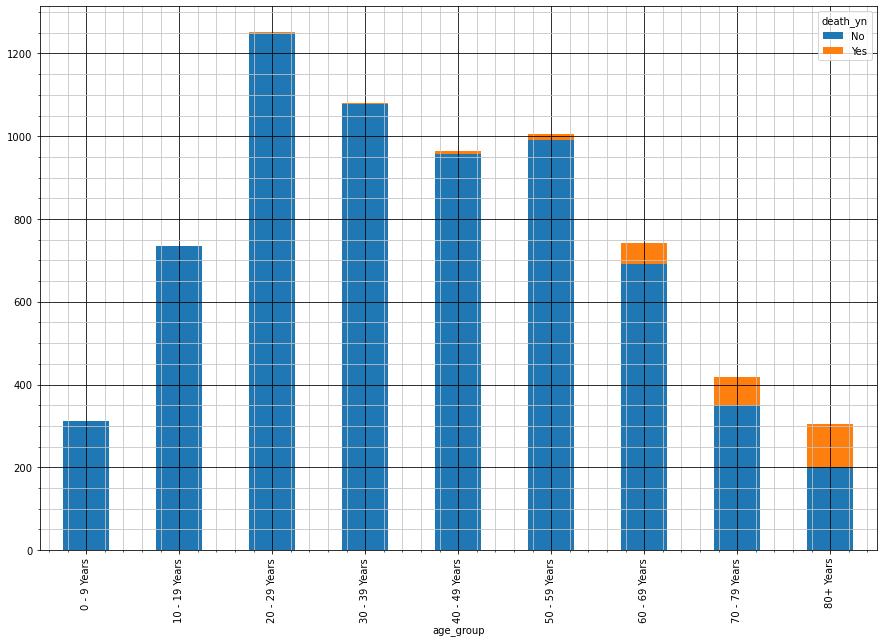

In [62]:
by_age= df.groupby(["age_group","death_yn"]).size()
by_age.unstack().plot(kind="bar",stacked = True, figsize=(15,10))

plt.grid(b=True, which="major",color="#000000",linestyle="-")
plt.minorticks_on()
plt.grid(b=True, which="minor",color="#c4c4c4",linestyle="-")
plt.rc("axes", axisbelow=True)

plt.savefig("relationship_ageGroup_death")

Here we can see the stacked bar plot for age groups against the target outcome death status

- There is a clear indication of an increase risk of death with an increase in age
- This indicates that an individual is at a greater risk of death due to COVID 19 if they are above the age of 30 with the greatest risk at the 80+ group

This is consistant with what we already know about how covid-19 affects populations and comes as no great suprise, however it is intresting that no deaths were recorded for the agegroups under 19.

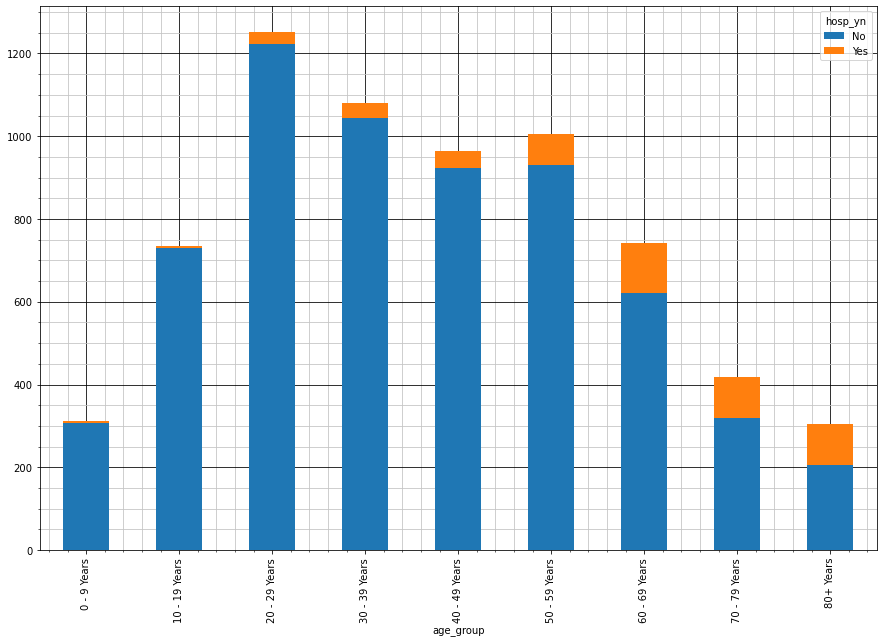

In [63]:
by_age= df.groupby(["age_group","hosp_yn"]).size()
by_age
by_age.unstack().plot(kind="bar",stacked = True, figsize=(15,10))

plt.grid(b=True, which="major",color="#000000",linestyle="-")
plt.minorticks_on()
plt.grid(b=True, which="minor",color="#c4c4c4",linestyle="-")
plt.rc("axes", axisbelow=True)

plt.savefig("relationship_ageGroup_hospitalisation")


Above we can see the stacked barchart for agegroup and hospitalisation.
- The groups with the highest proportion of hospitalisation are again over the age of 50
- with 60-69 appearing to experience the highest rates of hospitlisation (in proportion to cases)

It is intresting to note that all age groups have experienced hospitalisation (in contrast with death) which indicates that younger populations are able to fight off the virus much more successfully then older populations

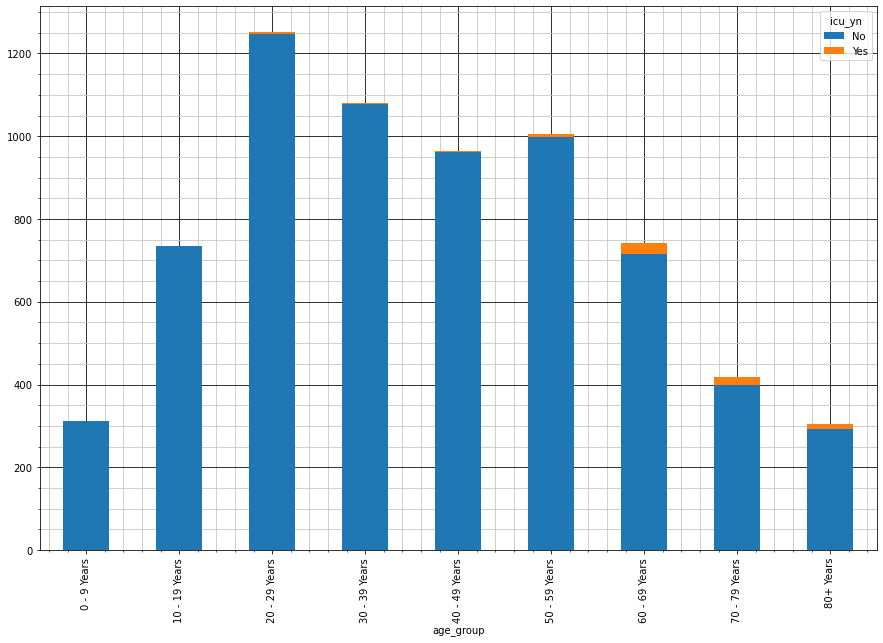

In [64]:
by_age= df.groupby(["age_group","icu_yn"]).size()
by_age.unstack().plot(kind="bar",stacked = True, figsize=(15,10))

plt.grid(b=True, which="major",color="#000000",linestyle="-")
plt.minorticks_on()
plt.grid(b=True, which="minor",color="#c4c4c4",linestyle="-")
plt.rc("axes", axisbelow=True)

plt.savefig("relationship_ageGroup_icuAdmission.pdf")

Here we have the stacked barchart for age groups and admission to ICU
- as seen with the other analysis the trend continous with the highest proportions being in the oldists categories
- Intrestingly the group with the highest proportion appears to be the 60-69 years

A possible reason for this trend could be that patients over the age of 70 may die before they can reach the ICU or the hospital

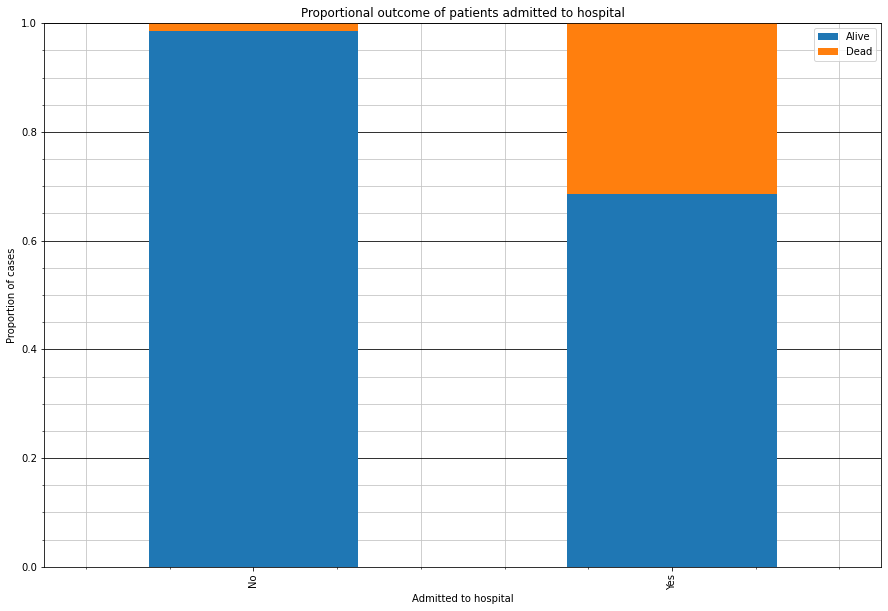

In [65]:
by_hospital=df.groupby(["hosp_yn"]).death_yn.value_counts(normalize=True)
#by_hospital
by_hospital_plot =by_hospital.unstack().plot(kind="bar",stacked = True, figsize=(15,10), title="Proportional outcome of patients admitted to hospital")
# add x and y labels
by_hospital_plot.set_ylabel("Proportion of cases")
by_hospital_plot.set_xlabel("Admitted to hospital")

# add legend labels
by_hospital_plot.legend(["Alive","Dead"])

#add gridlines

plt.grid(b=True, which="major",color="#000000",linestyle="-")
plt.minorticks_on()
plt.grid(b=True, which="minor",color="#c4c4c4",linestyle="-")
plt.rc("axes", axisbelow=True)
plt.ylim(0,1)

plt.savefig("relationship_hospitalAdmin_death")

Above is the stacked bar plot for hospital admission status against the target outcome death status
- There is a clear indication of an increased in deaths with regards to hospital admissions
- approx 1% of cases not admitted to the hospital resulted in death 
- approx 30% of cases admitted to the hospital resulted in death

This figure is not suprising as a case that is admitted to the hospital is going to be more serious then a case that is not (correlation is not causation).

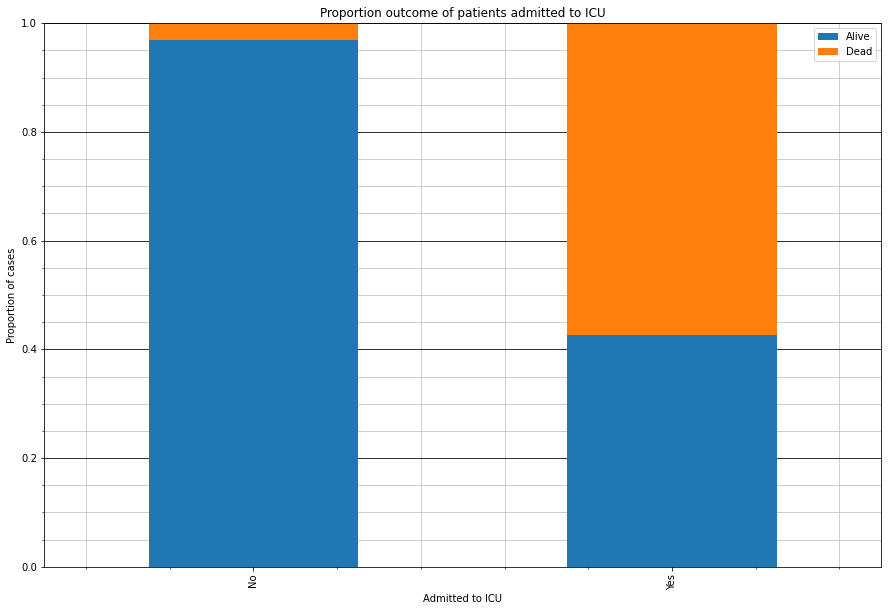

In [66]:
by_icu = df.groupby(["icu_yn"]).death_yn.value_counts(normalize=True)
by_icu
by_icu_plot=by_icu.unstack().plot(kind="bar",stacked = True, figsize=(15,10), title="Proportion outcome of patients admitted to ICU")
by_icu_plot.set_ylabel("Proportion of cases")
by_icu_plot.set_xlabel("Admitted to ICU")
by_icu_plot.legend(["Alive","Dead"])


plt.grid(b=True, which="major",color="#000000",linestyle="-")
plt.minorticks_on()
plt.grid(b=True, which="minor",color="#c4c4c4",linestyle="-")
plt.rc("axes", axisbelow=True)
plt.ylim(0,1)

plt.savefig("relationship_icu_death")

Here we see the stacked barchart for ICU admissions and Death

- Again there is a much higher proportion of deaths in cases that are admitted to the ICU

This is consistant with the hospital findings as a case that is admitted to the ICU is going to be more serious then a case not. However the proportion is suprising with the majority of ICU cases resulting in death. This indicates that once the virus has become this serious the patient outlook is not good

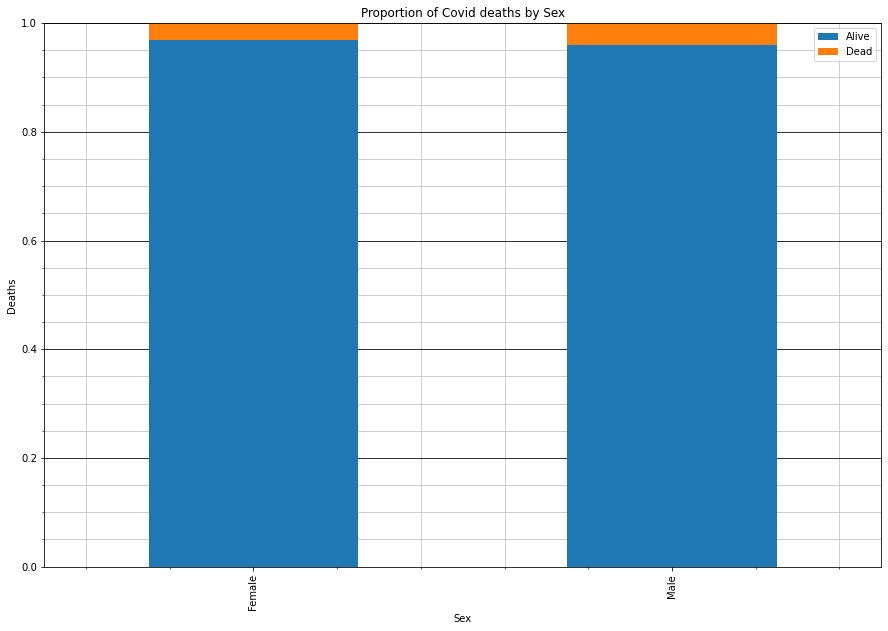

In [67]:
by_sex= df.groupby(["sex"]).death_yn.value_counts(normalize=True)

by_sex_plot=by_sex.unstack().plot(kind="bar",stacked = True, figsize=(15,10), title="Proportion of Covid deaths by Sex")


by_sex_plot.set_ylabel("Proportion of cases")
by_sex_plot.set_xlabel("Sex")

by_sex_plot.legend(["Alive","Dead"])

by_sex_plot.set_ylim([0,1])

plt.grid(b=True, which="major",color="#000000",linestyle="-")
plt.minorticks_on()
plt.grid(b=True, which="minor",color="#c4c4c4",linestyle="-")
plt.rc("axes", axisbelow=True)
plt.xlabel("Sex")
plt.ylabel("Deaths")
plt.ylim(0,1)

plt.savefig("relationship_sex_death")

Here we see the stacked barchart of sex and death.

- while there is a greater proportion of male deaths to female is it not hugely significant

These discrepencies could be caused by random chance.

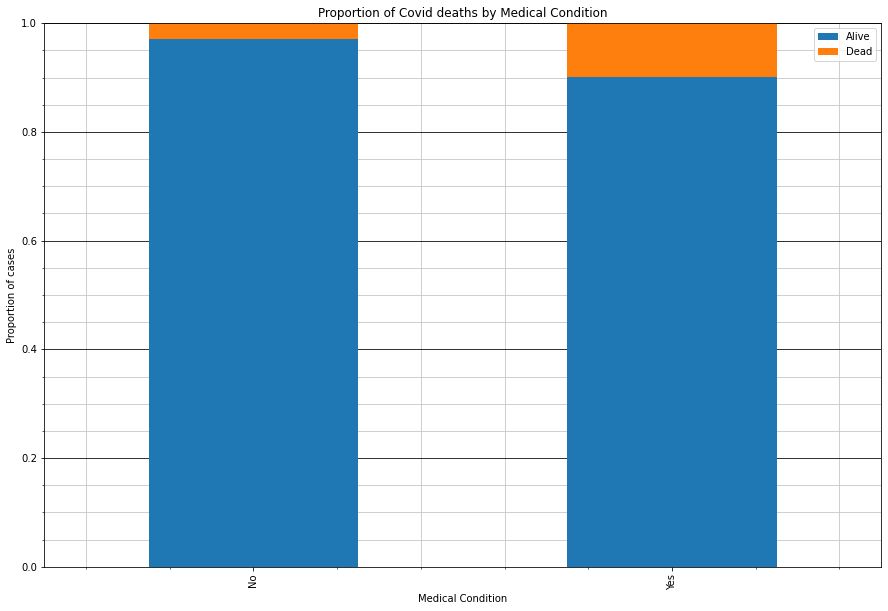

In [68]:

by_medcon= df.groupby(["medcond_yn"]).death_yn.value_counts(normalize=True)

by_medcon_plot=by_medcon.unstack().plot(kind="bar",stacked = True, figsize=(15,10), title="Proportion of Covid deaths by Medical Condition")

by_medcon_plot.set_ylabel("Proportion of cases")
by_medcon_plot.set_xlabel("Medical Condition")

by_medcon_plot.legend(["Alive","Dead"])

plt.grid(b=True, which="major",color="#000000",linestyle="-")
plt.minorticks_on()
plt.grid(b=True, which="minor",color="#c4c4c4",linestyle="-")
plt.rc("axes", axisbelow=True)
plt.ylim(0,1)

plt.savefig("relationship_medcond_death")


Here we see the stacked barchart for covid deaths and pre-existing medical conditions

- as shown the proportion of deaths in the group with conditions is much higher

This again is not suprising as government and healthcare agencies advice is those with pre existing conditions are much more suseptible to the virus. For future research is would be intresting to see how the type of condition affects outcome (e.g respitory etc etc)

# Transform, extend or combine the existing features to create a few new features (at least 3)

## New feature 1:
spec_before_symptoms:
- Measures (in boolean) if a postive specimen was collected before the onset of symptoms
- Can be used to gain a better understanding of a targeted feature as an early positive identification can be a type of early warning

In [69]:
df["spec_before_symptoms"]= ( df["onset_dt"] - df["pos_spec_dt"]).dt.days >0

df["spec_before_symptoms"].astype("category")

1       False
2       False
3       False
4       False
5       False
        ...  
9992    False
9994    False
9997    False
9998    False
9999    False
Name: spec_before_symptoms, Length: 6813, dtype: category
Categories (2, object): [False, True]

### Relationship between spec_before_symptoms and target feature

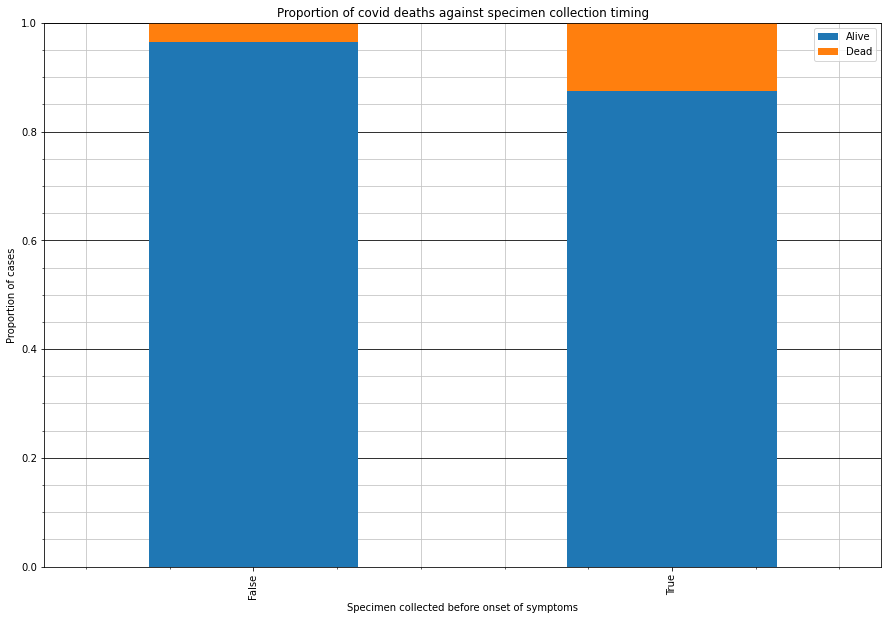

In [70]:
by_spec_time =  df.groupby(["spec_before_symptoms"]).death_yn.value_counts(normalize=True)

by_spec_time_plot=by_spec_time.unstack().plot(kind="bar",stacked = True, figsize=(15,10), title="Proportion of covid deaths against specimen collection timing")

by_spec_time_plot.set_ylabel("Proportion of cases")
by_spec_time_plot.set_xlabel("Specimen collected before onset of symptoms")

by_spec_time_plot.legend(["Alive","Dead"])

plt.grid(b=True, which="major",color="#000000",linestyle="-")
plt.minorticks_on()
plt.grid(b=True, which="minor",color="#c4c4c4",linestyle="-")
plt.rc("axes", axisbelow=True)
plt.ylim(0,1)

plt.savefig("relationship_spectiming_death")


Here we see the stacked bar chart showing the proportion of deaths to the groups who had specimens collected before the onset of symptoms and those who didnt

- Intrestingly the group who did have specimens collected before symptoms had a higher proportion of deaths

This was suprising as I had assumed that those who had the virus detected before becoming symptomatic would have a better outcome as they would have been fore-warned. It could be that the True group had a higher amount of already at-risk individuals and so were given more routine testing and so caught the virus earlier

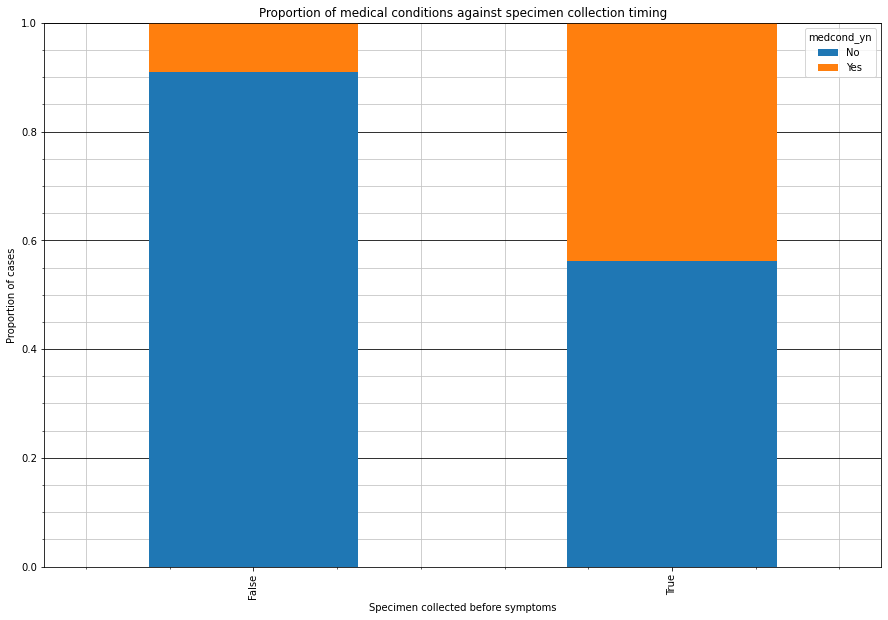

In [71]:
by_spec_medcon =  df.groupby(["spec_before_symptoms"]).medcond_yn.value_counts(normalize=True)

by_spec_medcon_plot=by_spec_medcon.unstack().plot(kind="bar",stacked = True, figsize=(15,10), title="Proportion of medical conditions against specimen collection timing")

by_spec_medcon_plot.set_ylabel("Proportion of cases")
by_spec_medcon_plot.set_xlabel("Specimen collected before symptoms")


plt.grid(b=True, which="major",color="#000000",linestyle="-")
plt.minorticks_on()
plt.grid(b=True, which="minor",color="#c4c4c4",linestyle="-")
plt.rc("axes", axisbelow=True)
plt.ylim(0,1)

plt.savefig("relationship_spectiming_medcon.pdf")


As suspected the discrepancy can be explained by the already at risk groups being more likely to undergo routine testing and thus have the virus detected earlier but still have a less fortunate outcome

## New Feature 2
month_of_onset
 - measures the month of the onset of symptoms
 - more general measure of onset_dt
 - Useful to see larger trends (e.g more deaths in the winter months)

In [72]:
df["month_of_onset"]= (df["onset_dt"]).dt.month

In [73]:
df["month_of_onset"].replace({1.0:"January",2.0:"February",3.0:"March",4.0:"April",5.0:"May",6.0:"June",7.0:"July",8.0:"August",9.0:"September",10.0:"October",11.0:"November",12.0:"December"},inplace=True)

### Relationship between Month of onset and target feature

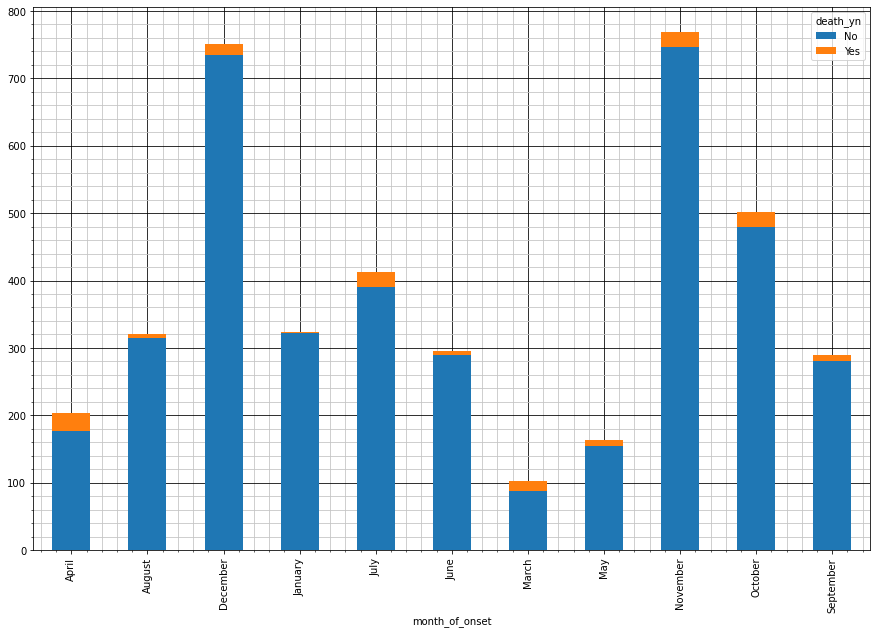

In [74]:
by_month= df.groupby(["month_of_onset","death_yn"]).size()
by_month
by_month.unstack().plot(kind="bar",stacked = True, figsize=(15,10))

plt.grid(b=True, which="major",color="#000000",linestyle="-")
plt.minorticks_on()
plt.grid(b=True, which="minor",color="#c4c4c4",linestyle="-")
plt.rc("axes", axisbelow=True)

plt.savefig("relationship_month_death")

Here we see the stacked barchart for month of symptom onset and the target outcome, death

- There does appear to be a trend towards a higher fatality in the colder months as apposed to summer
- However this is not a significant as I thought
- Intrestingly the two least-lethal months are January and August, traditionally colder months
- January being the least lethal is explainable by the virus not having widely spread across the US until March/April 2020 and so health services were less overwhelmed

## New Feature 3
age_approx
- Numerical approximation of the entries age
- Taken the median value of age_group
- allows for treating entries age as a continuous feature


In [75]:
df["age_approx"]= df["age_group"]

df["age_approx"].replace({"0 - 9 Years":5,"10 - 19 Years":15,"20 - 29 Years":25,"30 - 39 Years": 35, "40 - 49 Years": 45, "50 - 59 Years": 55, "60 - 69 Years": 65, "70 - 79 Years": 75, "80+ Years": 85},inplace=True)

df["age_approx"] = df["age_approx"].astype("int64")

### Descriptive statistics for age_approx

In [76]:
df["age_approx"].describe().T

count    6813.000000
mean       41.955820
std        20.869473
min         5.000000
25%        25.000000
50%        45.000000
75%        55.000000
max        85.000000
Name: age_approx, dtype: float64

### Box and whisker plot for age_approx

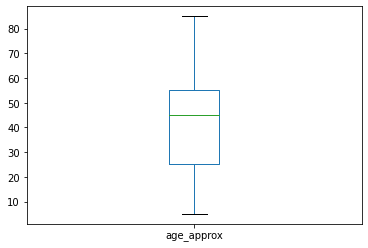

In [77]:
df["age_approx"].plot(kind="box")

plt.savefig("boxplot_age_numeric")

Intrestingly the Mean age for entries was 41 with the majority of cases falling between mid 20s and 50s. This is consistant with the population as a whole (e.g there are more 40 year olds then 80 year olds)

## New Feature 4
severity
- combines hosp_yn icu_yn and death_yn into one feature
- 0 indicates no negative outcomes (no hospital, icu or death)
- 1 indicates symptoms
- 2 indicates admitted to hospital
- 3 indicates admitted to icu
- 4 indicates death
- Entries are given highest applicable value

In [78]:
df["severity"]=0

df.loc[df.onset_dt.isna() == False, "severity"]=1
df.loc[df.hosp_yn == "Yes", "severity"]=2
df.loc[df.icu_yn == "Yes", "severity"]=3
df.loc[df.death_yn == "Yes", "severity"]=4

In [79]:
df["severity"].value_counts()

1    3729
0    2488
2     317
4     247
3      32
Name: severity, dtype: int64

### Relationship between age_group and severity

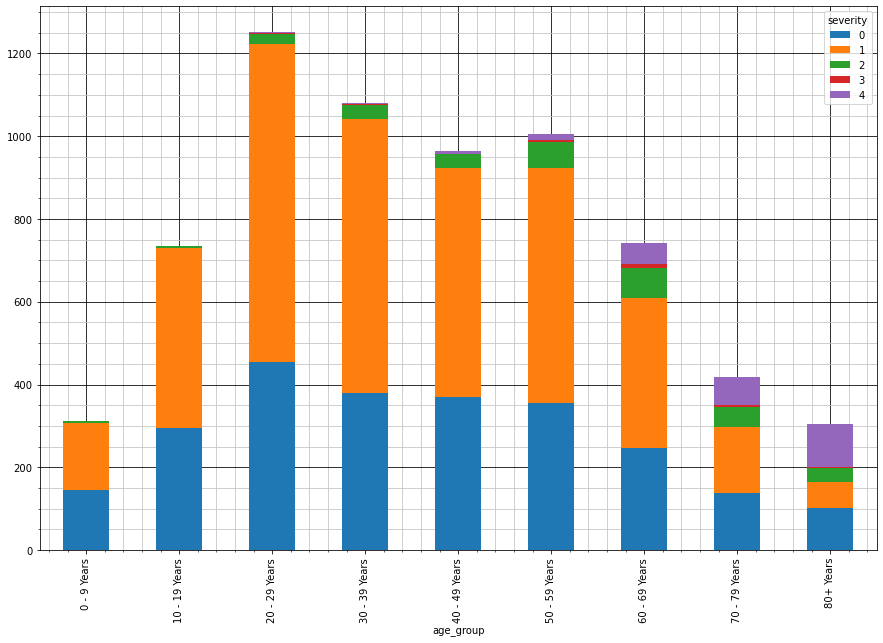

In [80]:

by_severity= df.groupby(["age_group","severity"]).size()
by_severity.unstack().plot(kind="bar",stacked = True, figsize=(15,10))

plt.grid(b=True, which="major",color="#000000",linestyle="-")
plt.minorticks_on()
plt.grid(b=True, which="minor",color="#c4c4c4",linestyle="-")
plt.rc("axes", axisbelow=True)

plt.savefig("relationship_severity_age")

Here we can see the stacked barchart for severity and age groups.
This allows us to gain a fuller picture of the outcome and challenges faced by each group.

As shown in the other charts the most severe outcomes become more likely as the ages increase
Intrestingly ICU admission (3 - red) did not change that substantially throughout the populations

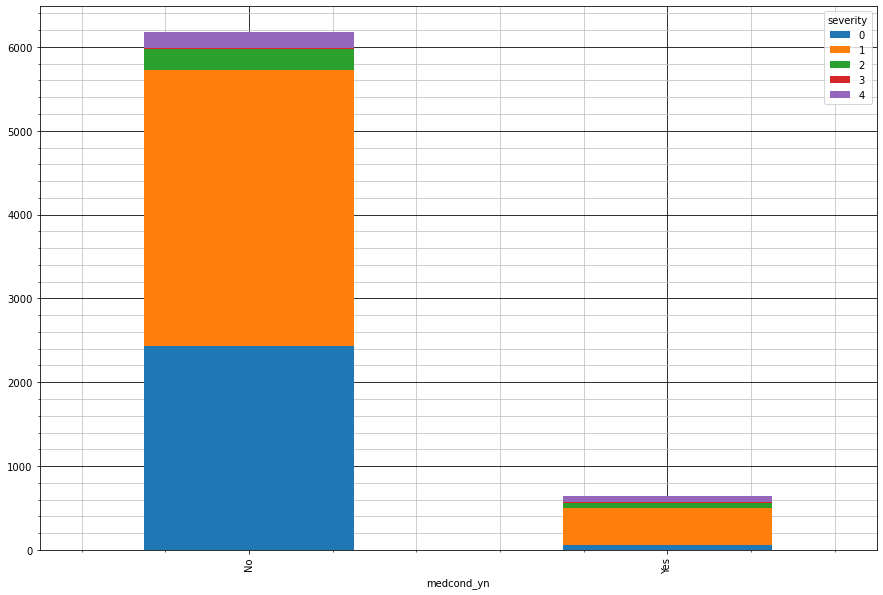

In [81]:

by_severityMed= df.groupby(["medcond_yn","severity"]).size()
by_severityMed.unstack().plot(kind="bar",stacked = True, figsize=(15,10))

plt.grid(b=True, which="major",color="#000000",linestyle="-")
plt.minorticks_on()
plt.grid(b=True, which="minor",color="#c4c4c4",linestyle="-")
plt.rc("axes", axisbelow=True)

plt.savefig("relationship_severity_Medcond.pdf")

here we can see the stacked barchart for severity and medical conditions
As previously thought a greater proportion of those with medical conditions had a severity >0

In [82]:
df.dtypes


cdc_case_earliest_dt    datetime64[ns]
cdc_report_dt           datetime64[ns]
pos_spec_dt             datetime64[ns]
onset_dt                datetime64[ns]
current_status                category
sex                             object
age_group                       object
hosp_yn                         object
icu_yn                          object
death_yn                      category
medcond_yn                      object
spec_before_symptoms              bool
month_of_onset                  object
age_approx                       int64
severity                         int64
dtype: object

In [83]:
df.to_csv("cdc_data_cleaned3_newfeatures.csv",index=False)